<a href="https://colab.research.google.com/github/InutilemMachina/DataSciRepo/blob/main/LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models

## Linear regression model

In [1]:
import numpy as np

np.random.seed(0)
m = 100
X = 2*np.random.randn(m,1)
y = 4 + 3*X + np.random.randn(m,1)

In [2]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept = True)
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
theta_0 = lin_reg.intercept_
theta_1 = lin_reg.coef_

[4.07515309] [[3.05734922]]


In [3]:
y_min, y_max = lin_reg.predict([min(X), max(X)])

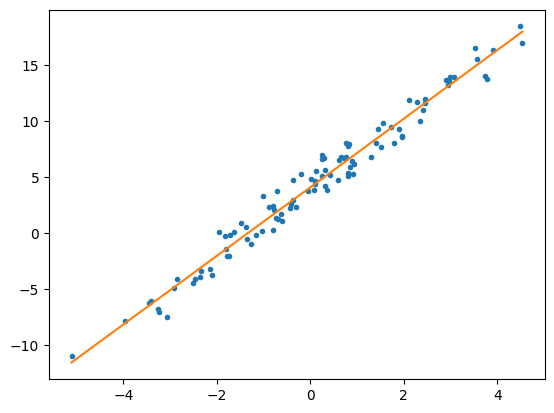

In [4]:
import matplotlib.pyplot as plt
plt.plot(X,y,'.')
plt.plot([min(X), max(X)],[y_min, y_max])

the same with gradient descent
sklearn only knows SGD (Batch and mini-batch not natively implemented)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [5]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(
    penalty = None,  # No regularization
    fit_intercept = True,  #  not necessary if standardized data are fitted
    max_iter = 1000, # epochs
    tol = 1e-5, # stopping criterion
    n_iter_no_change = 25,
    eta0 = 0.01,  # initial learning rate for learning schedules
    learning_rate = 'invscaling' )  # eta = eta0 / pow(t, power_t) learning schedule (t ?-? Number of weight updates performed during training. Same as (n_iter_ * n_samples + 1))
sgd_reg.fit(X,y)
sgd_reg.intercept_, sgd_reg.coef_

#  loss: str = "squared_error",
#  *,
#   penalty: str = "l2", "l1", "none"
#  alpha: float = 0.0001,
#  l1_ratio: float = 0.15,
#   fit_intercept: bool = True,
#   max_iter: int = 1000,
#   tol: float = 0.001,
#  shuffle: bool = True,
#  verbose: int = 0,
#  epsilon: float = DEFAULT_EPSILON,
#  random_state: Unknown | None = None,
#  learning_rate: str = "invscaling",
#   eta0: float = 0.01,
#  power_t: float = 0.25,
#  early_stopping: bool = False,
#  validation_fraction: float = 0.1,
#  n_iter_no_change: int = 5,
#  warm_start: bool = False,
#  average: bool = False)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([4.0744488]), array([3.05782365]))

## Polynomial model

In [6]:
m = 100
X = 5*np.random.randn(m,1)+2
y = 3 + 0.5*X + 0.2*X**2 + np.random.randn(m,1)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

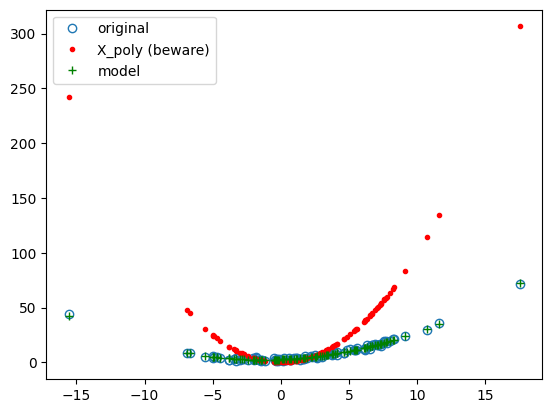

In [8]:
plt.plot(X,y,'o', markerfacecolor  = 'none', label='original')
plt.plot(X_poly[:,0],X_poly[:,1], 'r.', label = 'X_poly (beware)')
plt.plot(X, 2.75632596 + 0.51053291*X + 0.19809754*X**2, 'g+', label = 'model')
plt.legend()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.75632596]), array([[0.51053291, 0.19809754]]))

### Under- and overfitting

In [10]:
from sklearn.model_selection import learning_curve
# vigyázat, itt direkt a kvadratikus modellre illesztünk lineáris egyenest
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),X,y, train_sizes=np.linspace(0.01,1.0, 40), cv = 5,
    scoring = 'neg_root_mean_squared_error'
)

train_sizes.shape, train_scores.shape, valid_scores.shape

((40,), (40, 5), (40, 5))

In [11]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

In [12]:
# plt.plot(train_sizes,  label = 'train_sizes')
# plt.plot(train_errors, label = 'train_errors')
# plt.plot(valid_errors, label = 'valid_errors')
# plt.xlabel('i-th iteration')
# plt.legend()

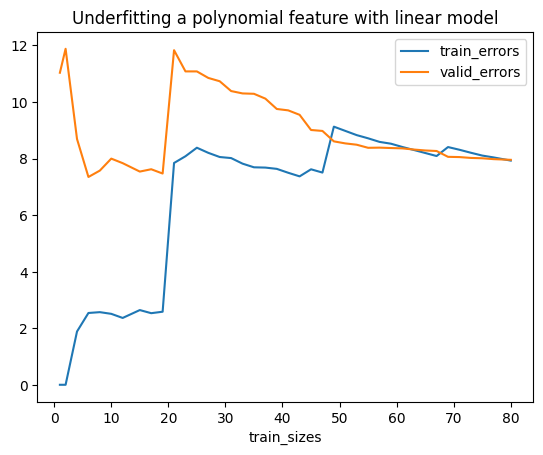

In [13]:
plt.plot(train_sizes, train_errors, label = 'train_errors')
plt.plot(train_sizes, valid_errors, label = 'valid_errors')
plt.xlabel('train_sizes')
plt.title('Underfitting a polynomial feature with linear model')
plt.legend()

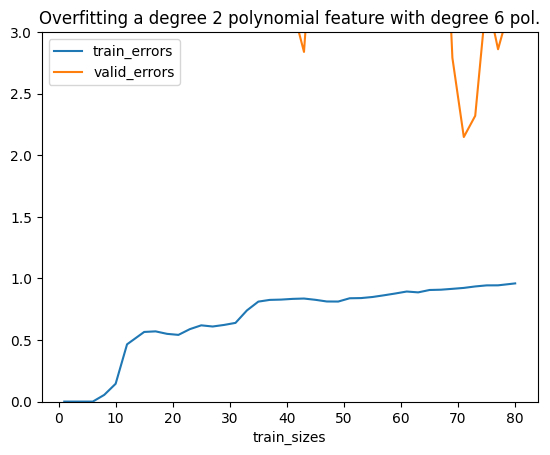

In [14]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree = 6),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression,X,y, train_sizes=np.linspace(0.01,1.0, 40), cv = 5,
    scoring = 'neg_root_mean_squared_error'
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, label = 'train_errors')
plt.plot(train_sizes, valid_errors, label = 'valid_errors')
plt.xlabel('train_sizes')
plt.title('Overfitting a degree 2 polynomial feature with degree 6 pol.')
plt.ylim([0,3])
plt.legend()

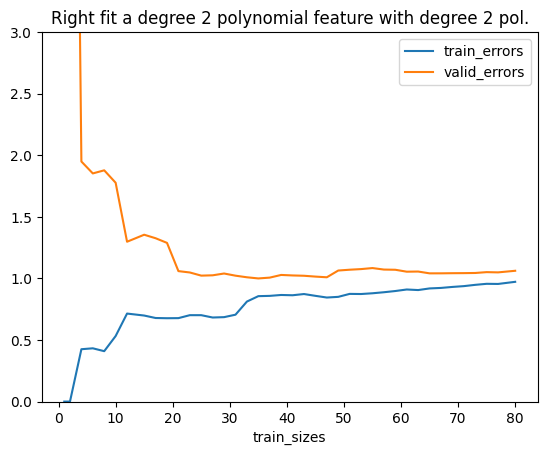

In [15]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree = 2),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression,X,y, train_sizes=np.linspace(0.01,1.0, 40), cv = 5,
    scoring = 'neg_root_mean_squared_error'
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, label = 'train_errors')
plt.plot(train_sizes, valid_errors, label = 'valid_errors')
plt.xlabel('train_sizes')
plt.title('Right fit a degree 2 polynomial feature with degree 2 pol.')
plt.ylim([0,3])
plt.legend()

# Regularized Linear Models

Important to scale the data, since Ridge is sensitive to the scale, which is true of most regularized models.

In [16]:
m = 100
X = np.linspace(5,15,m).reshape(-1,1) + np.random.rand(m,1)
y = 1 + 2*X + 3*X**2 + 4*np.random.randn(m,1)

In [17]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
y_scaled = std_scaler.fit_transform(y)

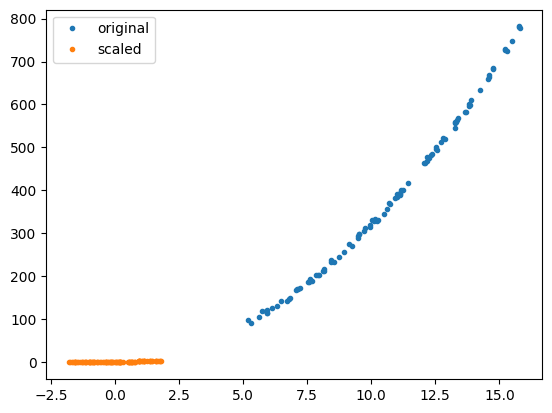

In [18]:
plt.plot(X,y, '.', label = 'original')
plt.plot(X_scaled, y_scaled, '.', label = 'scaled')
plt.legend()
plt.show()

## Ridge regression

Generally:

    from sklearn.linear_model import Ridge
    ridge_reg = Ridge(alpha=0.1, solver="cholesky")
    
N.B: $\alpha = 0.1/m$ in `SGDRegressor`.


In [19]:
sgd_reg = SGDRegressor(penalty="l2", alpha = 0.1/m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_scaled_reg = SGDRegressor(penalty="l2", alpha = 0.0001/m, tol=None, max_iter=1000, eta0=0.1, random_state=42)

sgd_reg.fit(X, y.ravel())
sgd_scaled_reg.fit(X_scaled, y_scaled.ravel())

y_pred = sgd_reg.predict(X)
y_scaled_pred = sgd_scaled_reg.predict(X_scaled)

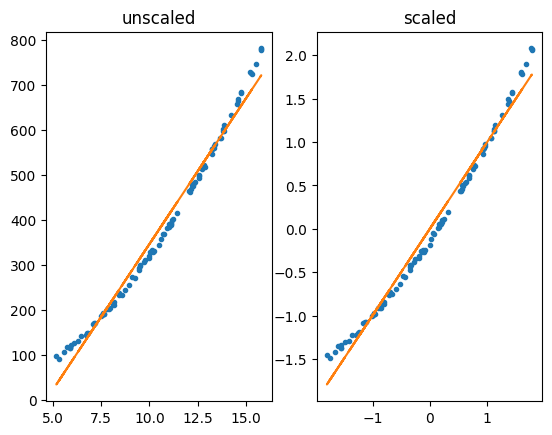

In [20]:
fig, ax = plt.subplots(1,2)
ax[0].plot(X,y, '.', label = 'original')
ax[0].plot(X, y_pred, label = 'prediction orig.')
ax[0].set_title('unscaled')
ax[1].plot(X_scaled, y_scaled, '.', label = 'scaled')
ax[1].plot(X_scaled, y_scaled_pred, label = 'prediction scaled')
ax[1].set_title('scaled')
plt.show()

polynomial makes more sense, but don't forget standardization

In [21]:
sgd_polynomial_regression = make_pipeline(
    PolynomialFeatures(degree = 5),
    SGDRegressor(penalty="l2", alpha = 0.1/m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
    )

sgd_scaled_polynomial_regression = make_pipeline(
    PolynomialFeatures(degree = 5),
    SGDRegressor(penalty="l2", alpha = 0.1/m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
    )

sgd_polynomial_regression.fit(X,y.ravel())
sgd_polynomial_regression.fit(X_scaled,y_scaled.ravel())

y_pred = sgd_polynomial_regression.predict(X)
y_scaled_pred = sgd_polynomial_regression.predict(X_scaled)

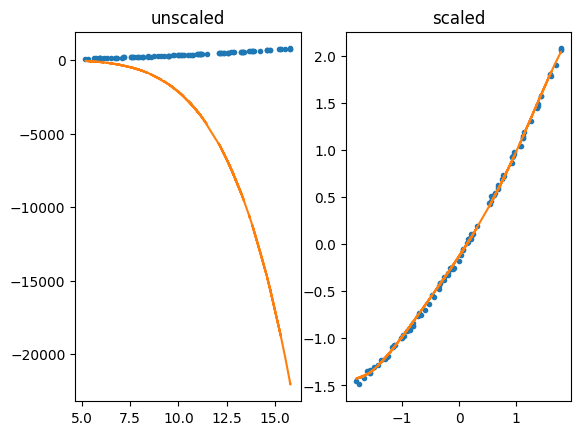

In [22]:
fig, ax = plt.subplots(1,2)
ax[0].plot(X,y, '.', label = 'original')
ax[0].plot(X, y_pred, label = 'prediction orig.')
ax[0].set_title('unscaled')
ax[1].plot(X_scaled, y_scaled, '.', label = 'scaled')
ax[1].plot(X_scaled, y_scaled_pred, label = 'prediction scaled')
ax[1].set_title('scaled')
plt.show()

## Lasso regression

play with alpha

In [23]:
sgd_polynomial_regression = make_pipeline(
    PolynomialFeatures(degree = 4),
    SGDRegressor(penalty="l1", alpha = 0.1, tol=None, max_iter=1000, eta0=0.01, random_state=42)
    )

sgd_scaled_polynomial_regression = make_pipeline(
    PolynomialFeatures(degree = 4),
    SGDRegressor(penalty="l1", alpha = 0.1, tol=None, max_iter=1000, eta0=0.01, random_state=42)
    )

sgd_polynomial_regression.fit(X,y.ravel())
sgd_polynomial_regression.fit(X_scaled,y_scaled.ravel())

y_pred = sgd_polynomial_regression.predict(X)
y_scaled_pred = sgd_polynomial_regression.predict(X_scaled)

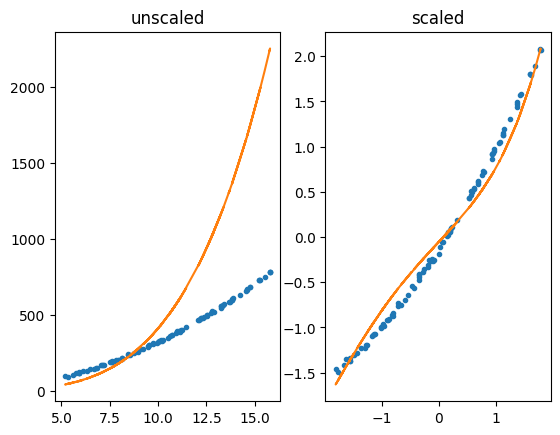

In [24]:
fig, ax = plt.subplots(1,2)
ax[0].plot(X,y, '.', label = 'original')
ax[0].plot(X, y_pred, label = 'prediction orig.')
ax[0].set_title('unscaled')
ax[1].plot(X_scaled, y_scaled, '.', label = 'scaled')
ax[1].plot(X_scaled, y_scaled_pred, label = 'prediction scaled')
ax[1].set_title('scaled')
plt.show()

## Elastic net regression

play with alpha

In [25]:
sgd_polynomial_regression = make_pipeline(
    PolynomialFeatures(degree = 5),
    SGDRegressor(l1_ratio = 0.5, alpha=0.1, tol=None, max_iter=1000, eta0=0.01, random_state=42)
    )

sgd_scaled_polynomial_regression = make_pipeline(
    PolynomialFeatures(degree = 5),
    SGDRegressor(l1_ratio = 0.5, alpha=0.1, tol=None, max_iter=1000, eta0=0.01, random_state=42)
    )

sgd_polynomial_regression.fit(X,y.ravel())
sgd_polynomial_regression.fit(X_scaled,y_scaled.ravel())

y_pred = sgd_polynomial_regression.predict(X)
y_scaled_pred = sgd_polynomial_regression.predict(X_scaled)

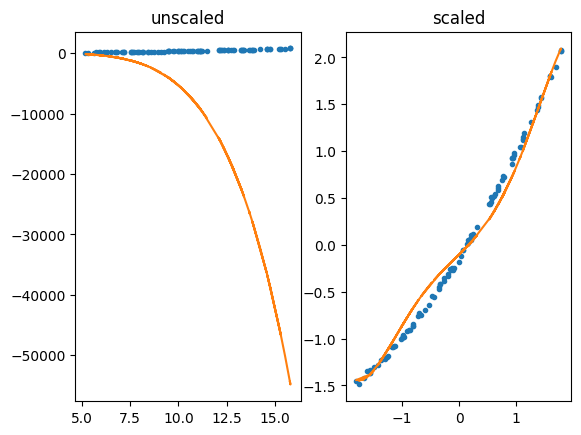

In [26]:
fig, ax = plt.subplots(1,2)
ax[0].plot(X,y, '.', label = 'original')
ax[0].plot(X, y_pred, label = 'prediction orig.')
ax[0].set_title('unscaled')
ax[1].plot(X_scaled, y_scaled, '.', label = 'scaled')
ax[1].plot(X_scaled, y_scaled_pred, label = 'prediction scaled')
ax[1].set_title('scaled')
plt.show()

## Early stopping

another way to regularize iterative learning such as the gradient descent is to stop training when validation error reaches a minimum.

In [27]:
m = 500
X = np.linspace(-6,6,m) + np.random.randn(1,m)
y = -20 + 0.3*X - 1.8*X**2 + 0.05*X**4 + np.random.randn(1,m)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X.shape, y.shape

((500, 1), (500, 1))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((400, 1), (400, 1), (100, 1), (100, 1))

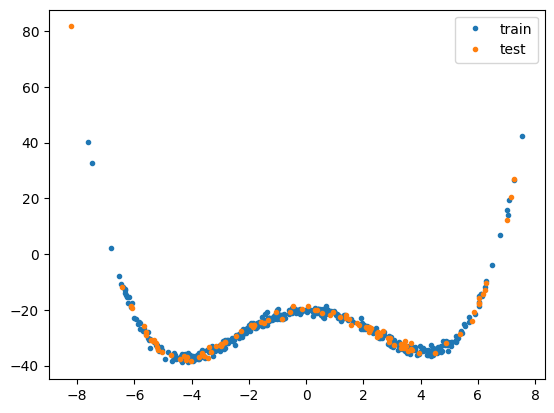

In [29]:
plt.plot(X_train,y_train,'.', label = 'train')
plt.plot(X_test,y_test,'.', label = 'test')
plt.legend()

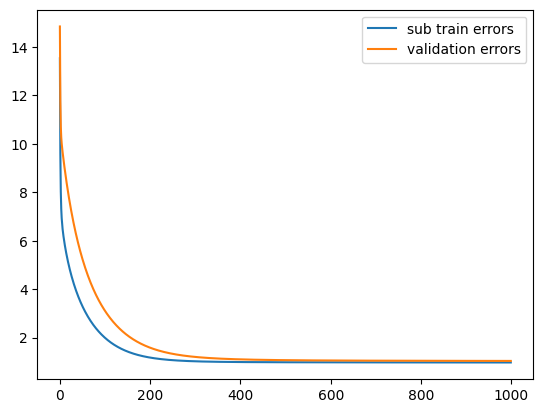

In [30]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# split the TRAINING set into a smaller training set and a validation set)
X_subtrain, X_valid, y_subtrain, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=42)


# nem érdemes a degree-t magasra állítani,
# learning rate-tel és epoch számmal játszani kell.
preprocessing = make_pipeline(  # Create a preprocessing pipeline
    PolynomialFeatures(degree=5, include_bias=False),  # Add polynomial features up to degree 90
    StandardScaler(),  # Scale the features to have zero mean and unit variance
)

X_subtrain_prep = preprocessing.fit_transform(X_subtrain)  # Preprocess the training set
X_valid_prep = preprocessing.transform(X_valid)  # Preprocess the validation set

# Create an instance of the SGDRegressor class with no regularization and a small learning rate
sgd_reg = SGDRegressor(penalty=None, eta0=0.01, random_state=7)

n_epochs = 1000  # Set the number of epochs to train for
best_valid_rmse = float('inf')  # Initialize the best validation error to infinity
train_errors, valid_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_subtrain_prep, y_subtrain.ravel())  # Train on a BATCH of data and use PARTIAL_FIT() instead of FIT()
        # A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
    y_valid_predict = sgd_reg.predict(X_valid_prep)  # Predict on the validation set
    valid_error = mean_squared_error(y_valid, y_valid_predict, squared=False)  # Compute the validation error

    if valid_error < best_valid_rmse:  # If it is lower than the lowest RMSE seen so far,
        best_valid_rmse = valid_error  # it updates the best validation error
        best_model = deepcopy(sgd_reg)  # and saves a copy of this model, which saves the hyperparams as well
        best_epoch = epoch

    # evaluate train error
    y_subtrain_predict = sgd_reg.predict(X_subtrain_prep)
    train_error = mean_squared_error(y_subtrain, y_subtrain_predict, squared=False)
    valid_errors.append(valid_error)
    train_errors.append(train_error)

plt.plot(train_errors, label = 'sub train errors')
plt.plot(valid_errors, label = 'validation errors')
plt.legend()

In [31]:
y_subtrain_predict = best_model.predict(X_subtrain_prep)

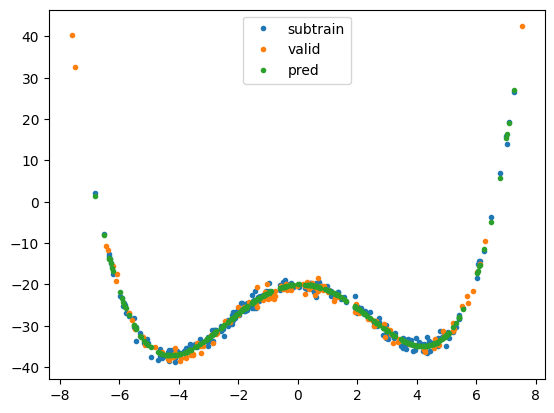

In [32]:
plt.plot(X_subtrain,y_subtrain,'.', label = 'subtrain')
plt.plot(X_valid,y_valid,'.', label = 'valid')
plt.plot(X_subtrain,y_subtrain_predict,'.', label = 'pred')
# plt.ylim([-40,80])
plt.legend()

és ne feledjük, van még egy test setünk, modellek összehasonlítására

# Logisztikus regresszió

In [75]:
x1 = np.random.randn(50,1)
x2 = 2+np.random.randn(50,1)*0.5
X = np.concatenate((x1,x2), axis = 0)
y1 = np.array(50*[0])
y2 = np.array(50*[1])
y = np.concatenate((y1,y2), axis = 0)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression(random_state=0)

In [78]:
logreg_clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [79]:
logreg_clf.predict_proba(X_train)[:5]

array([[0.84504827, 0.15495173],
       [0.02961432, 0.97038568],
       [0.85456816, 0.14543184],
       [0.03342283, 0.96657717],
       [0.06047606, 0.93952394]])

In [80]:
logreg_clf.predict(X_train)[:5]

array([0, 1, 0, 1, 1])

In [81]:
logreg_clf.score(X_train,y_train)

0.9402985074626866

In [82]:
import numpy as np
X_new = np.linspace(min(X), max(X), 100).reshape(-1, 1)
y_new = logreg_clf.predict_proba(X_new)

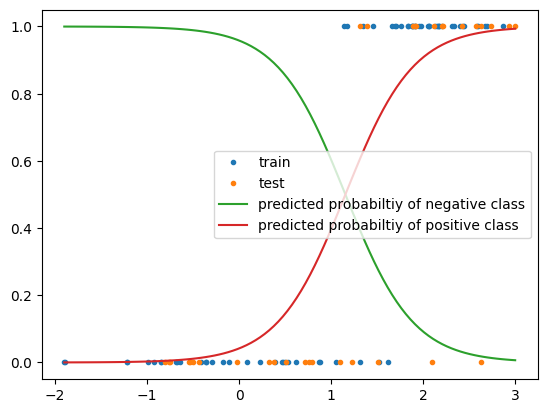

In [83]:
import matplotlib.pyplot as plt

plt.plot(X_train,y_train,'.', label = 'train')
plt.plot(X_test,y_test,'.', label = 'test')
plt.plot(X_new,y_new[:,0], label = 'predicted probabiltiy of negative class')
plt.plot(X_new,y_new[:,1], label = 'predicted probabiltiy of positive class')
plt.legend()

In [84]:
decision_boundary = X_new[y_new[:, 1] >= 0.5][0, 0]
decision_boundary

1.1680793907089941

## Logistic regression on 2 features

In [85]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

In [86]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# The higher the value of C, the less the model is regularized
log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

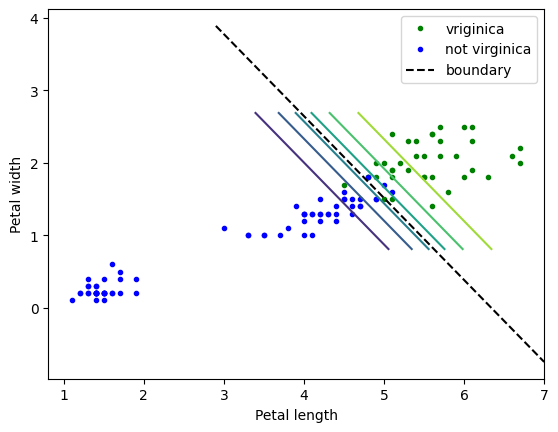

In [87]:
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'g.', label = 'vriginica')
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'b.', label = 'not virginica')
contour = plt.contour(x0, x1, zz)# cmap=plt.cm.brg
# plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", label = 'boundary')
# plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
# plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

#Softmax regression

generalization of logistic regression to support multinomial regression

In [89]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 0)

In [90]:
softmax_reg = LogisticRegression(C = 30, random_state = 0)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=0)

In [93]:
softmax_reg.predict([[5,2]])  # prediction of e.g. a measurement woth 5 and 2 cm

array([2])

In [94]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])

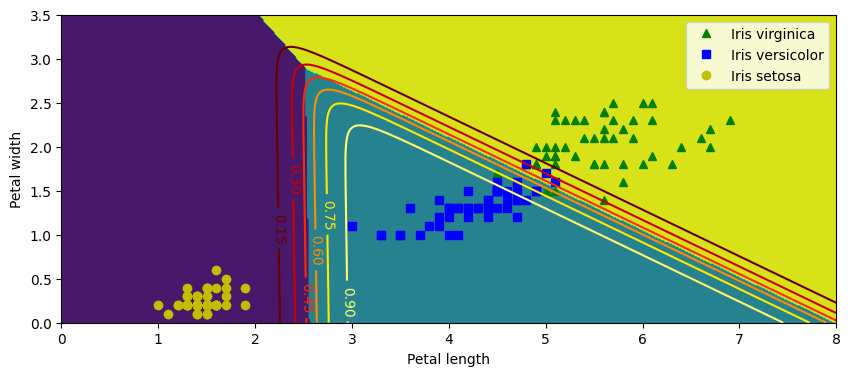

In [95]:
from matplotlib.colors import ListedColormap

# custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz) #, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")

plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
# plt.axis([0.5, 7, 0, 3.5])
# plt.grid()
plt.show()